In [88]:
import importlib
import torch
import itertools
import numpy as np
from utils import stats, img, shift

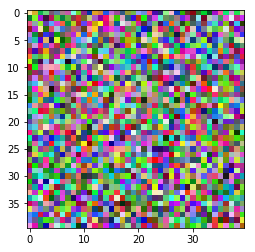

In [105]:
x = img.random_image(1, 40)
img.show_image(x)

/home/lewington/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


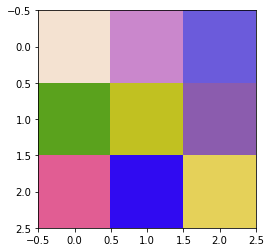

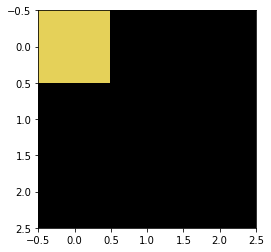

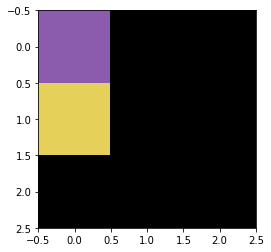

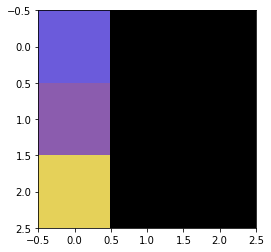

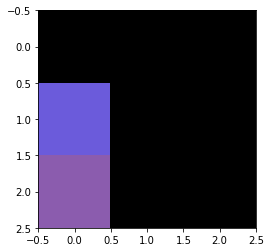

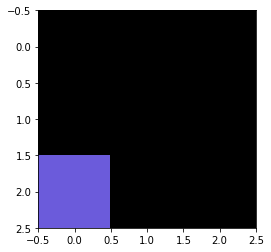

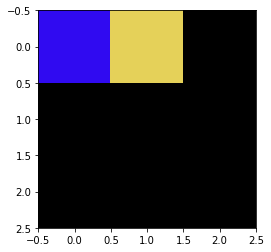

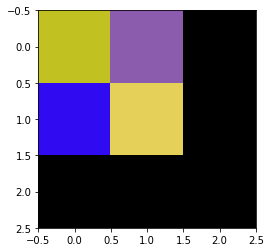

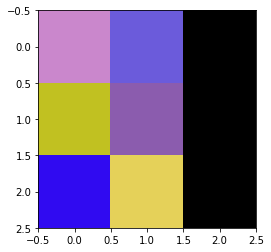

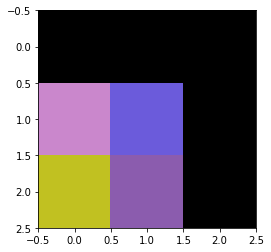

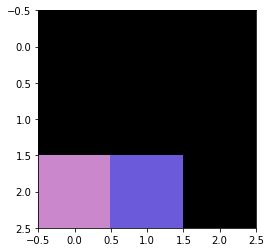

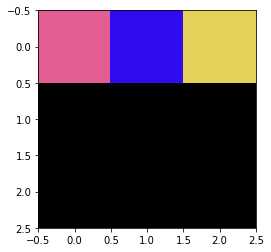

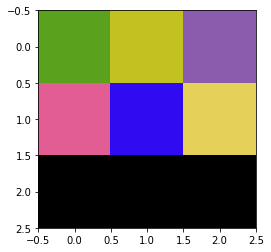

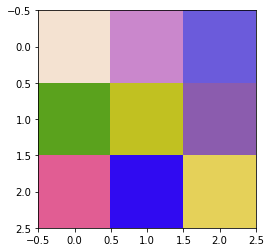

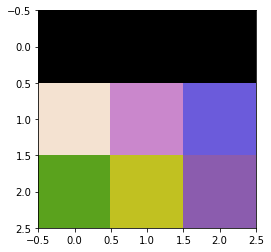

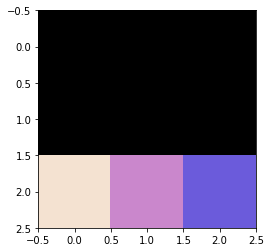

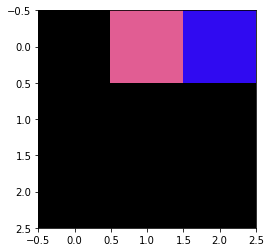

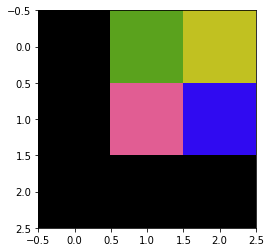

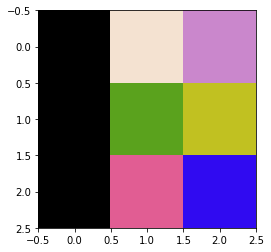

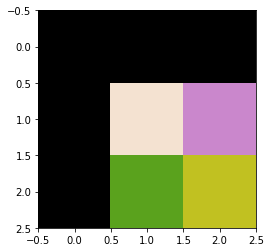

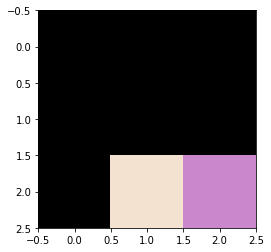

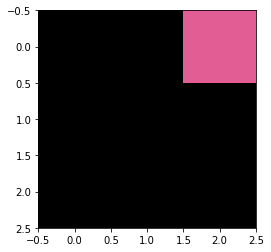

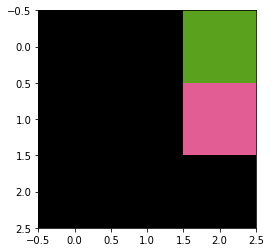

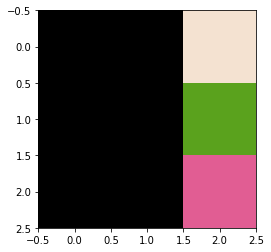

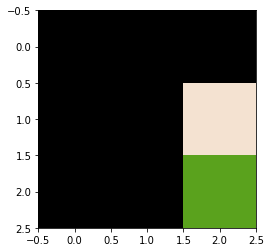

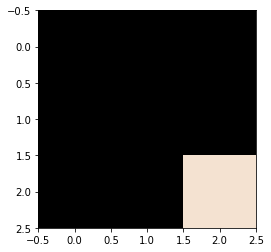

In [106]:
x = img.random_image(1, 3)
img.show_image(x)
importlib.reload(shift)
shifter = shift.Shifter()
y = shifter.all_displacements(x, 2, 2)
for j in y:
    img.show_image

In [50]:
shifter.__device

AttributeError: 'Shifter' object has no attribute '__device'

In [79]:
for i in (6, 5):
    print(i)

6
5


In [101]:
list(itertools.product([1, 0, -1], [1, 0]))

[(1, 1), (1, 0), (0, 1), (0, 0), (-1, 1), (-1, 0)]

In [99]:
list(range(-9, 10))

[-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [108]:
10 ** -1

0.1